In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('gold_price_data.csv')

In [3]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [6]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Splitting the Features and Target

In [10]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [11]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [12]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test Data

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

Model Training:
Random Forest Regressor

In [14]:
regressor = RandomForestRegressor(n_estimators=100)

In [15]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [16]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [17]:
print(test_data_prediction)

[122.59609927 130.76910265 127.74740007  96.54939748 118.63830065
 114.56339968 124.73380146 117.79479961 108.06130139  98.37709988
  95.45289985 167.65259831 148.40030153 116.3743003  170.48180149
  85.04159987 123.24519891 108.9123972  113.15950058 131.42750326
 124.25969907 113.46970069 116.03230059 108.89800018 108.55050206
 125.80029958 119.6059991  112.63329896 113.54800165 125.81719884
 145.98660103  89.49480013 167.90619997 113.91509924 108.65540126
 120.186501   142.04469867 161.14700178 174.02429739 153.19060139
 119.4375012  113.67280055 121.43699926 113.57219921 122.07963824
 108.0881009   88.19889902 114.44289915 129.91330279 118.04820117
 103.42709982 129.89220261 107.09839832 160.711603   131.6566999
 118.44849973 146.51970036 136.1940017   95.33660122 124.62670144
 114.84069867  86.16460044 104.2407993  113.90470052  84.28899928
 122.29083812 116.5423992  113.57070185 165.65860315  92.2007001
  80.38280087 161.20120031 158.15940336 106.70620025 148.69920153
 109.5729978

In [18]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9896219003262587


Compare the Actual Values and Predicted Values in a Plot

In [19]:
Y_test = list(Y_test)

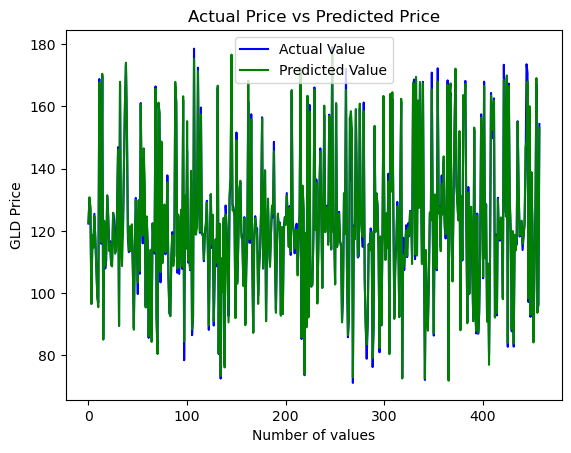

In [20]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()